In [32]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt
from numpy.random import choice, rand 

In [63]:
Lambda = np.array([
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0],
])

omega = np.sum(Lambda, axis=1)
omega_star = np.max(omega)
Q = Lambda/omega_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(omega))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)

pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print('Q: ', Q)
print("pi_bar=", pi_bar)

Q:  [[0.4        0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.33333333 0.         0.33333333 0.33333333]]
pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


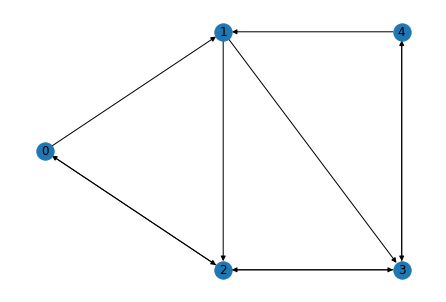

In [55]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(1,2), (1, 3),  (0, 1), (4, 1), (3, 4), (4, 3), (0, 2), (2, 0), (2, 3), (3, 2)])

positions = {1: (1,1), 2: (1,-1), 3: (2,-1), 4: (2,1), 0: (0,0)}

nx.draw(G, positions, with_labels=True)
# plt.savefig("graph1.eps",format='eps')

# A

In [21]:
D = np.diag(omega)
P = np.linalg.inv(D) @ Lambda
Q_cum = np.cumsum(Q, axis=1)
P_cum = np.cumsum(P, axis=1)

# set the number of the simulation
n_simulations = 1000
return_times = []
for s in range(n_simulations):
    transition_time = 0
    pos = 1
    while True: # simulate random walk until it returns to the same position
        t_next = -np.log(np.random.rand())/omega[pos]
        pos = np.argwhere(P_cum[pos] > np.random.rand())[0][0]
        transition_time += t_next
        if pos == 1:
            break
        

    return_times.append(transition_time)
print(np.mean(return_times))

6.7876476896256355


# B 

\begin{equation}\label{eq3}
\mathop{\mathbb{E}_a[\bar{T}^+_a]} = \frac{1}{\omega_i\bar{\pi_i}}
\end{equation}

In [22]:
1/(omega[1]*pi_bar[1])

6.750000000000008

# C

In [69]:
# set the number of the simulation
n_simulations = 5000

hitting_times = []
import copy
for s in range(n_simulations):
    transition_time = 0
    old_pos = 0
    pos = 0
    t_next = -np.log(np.random.rand())/omega[pos]
    while pos != 4: #simulate the random walk until it reaches node 4
        pos = np.argwhere(P_cum[old_pos] > np.random.rand())[0][0]
        transition_time += t_next
        old_pos = copy.deepcopy(pos)
        t_next = -np.log(np.random.rand())/omega[pos]
    hitting_times.append(transition_time)
print(np.mean(hitting_times),'\n')

8.892891378442497 



# D

In [70]:
# Define the set S and the remaining nodes R
S = [4] 
n_nodes = n_nodes = G.number_of_nodes()
R = [node for node in range(n_nodes) if node not in S]

# Restrict Q to R x R to obtain hat(Q)
Q_hat = Q[np.ix_(R, R)]

# solve the linear system to obtain hat(x)
# np.linalg.solve solves a linear matrix equation given
# the coefficient matrix and the dependent variable values
x_hat = np.linalg.solve((np.identity(n_nodes-1)-Q_hat),np.ones(n_nodes-1))
# map node to position of node in hatx (no change in our case because we removed last node)
map = {0: 0, 1: 1, 2: 2, 3:3}

# define the hitting times to the set S
# hitting time is 0 if the starting node is in S
hitting_s = np.zeros(n_nodes)
# hitting time is hat(x) for nodes in R
for r in R:
    hitting_s[r] = x_hat[r]
    
print("Hitting times:", hitting_s)
print("Hitting time for 0:", hitting_s[0])

Hitting times: [8.78571429 7.14285714 7.07142857 3.35714286 0.        ]
Hitting time for 0: 8.785714285714286


# E 
Interpret the matrix Λ as the weight matrix of a graph G = (V, E, Λ), and simulate the French-
DeGroot dynamics on G with an arbitrary initial condition x(0). Does the dynamics converge
to a consensus state? Motivate your answer.

In [86]:
w,v = np.linalg.eig(P.T)
np.random.seed(2045)
init_vec = np.random.rand(G.number_of_nodes())
values = []
values.append(init_vec)
print('Initial values:',init_vec)
# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)

consensus = np.sum(pi*init_vec)
print('Consensus:', consensus)

np.random.seed(2045)
x = np.random.rand(G.number_of_nodes())

for n in range(99):
    x = P @ x
    values.append(x)

print("x(100):", x, "\n")

Initial values: [0.84417125 0.88556227 0.13949022 0.06054265 0.19244713]
Consensus: 0.3497716787204977
x(100): [0.34977168 0.34977168 0.34977168 0.34977168 0.34977168] 



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


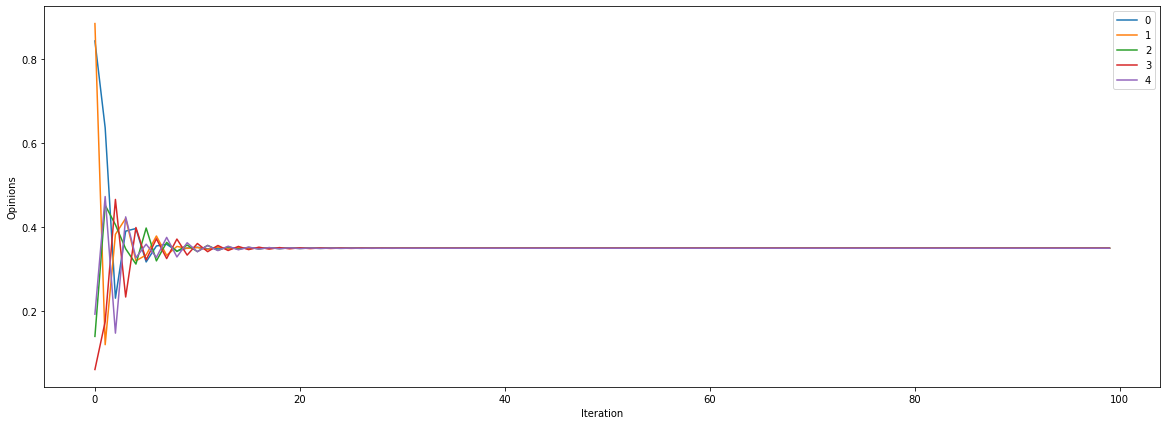

In [89]:
fig, ax = plt.subplots(figsize=(20,7)) 
for node in range(G.number_of_nodes()):
    plt.plot(np.array(values)[:,node], label=node)
ax.legend()
plt.xlabel('Iteration')
plt.ylabel('Opinions')
plt.legend()
plt.savefig("plot_con_e.eps",format='eps')

# F 
Assume that the initial state of the dynamics for each node i ∈ V is given by x i (0) = ξ i , where
{ξ i } i∈V are i.i.d random variables with variance σ 2 . Compute the variance of the consensus
value, and compare your results with numerical simulations.

In [36]:
w,v = np.linalg.eig(P.T)
mu = 0
sigma2 = 16
sigma = np.sqrt(sigma2)
consensus = []
num_sims = 2000

for counter in range(num_sims):
    init_vec = np.random.normal(loc=mu, scale=sigma, size=G.number_of_nodes())
    for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
        pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
        pi = pi/np.sum(pi)
    consensus.append(np.sum(pi*init_vec))
    
print('Sigma^2:', sigma2)
print('Variance in consensus values from simulation:', np.var(consensus,ddof=True))
theo_var = sigma2*np.sum(pi**2)
print("Theretical var:", theo_var)

Sigma^2: 16
Variance in consensus values from simulation: 3.5436552952654403
Theretical var: 3.4177693761814743


# G 
Remove the edges (d, a) and (d, c). Describe and motivate the asymptotic behaviour of the
dynamics. If the dynamics converges to a consensus state, how is the consensus value related
to the initial condition x(0)? Assume that the initial state of the dynamics for each node
i ∈ V is given by x i (0) = ξ i , where {ξ i } i∈V are i.i.d random variables with variance σ 2 .
Compute the variance of the consensus value. Motivate your answer.

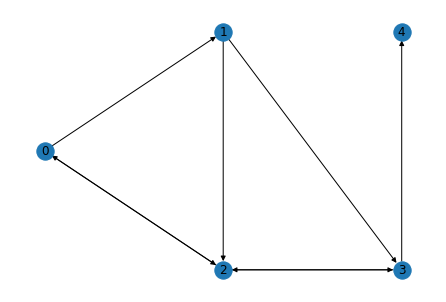

In [56]:
G1 = G.copy()
G1.remove_edges_from([(4,1), (4,3)])
G1.add_edge(4,4)
nx.draw(G1, pos=positions, with_labels = True)
# plt.savefig("graph1_g.eps",format='eps')

In [38]:
Lambda1 = Lambda.copy()
Lambda1[4, :] = np.zeros(len(Lambda1))
eps = 1e-10
Lambda1[4,4] = eps
omega1 = np.sum(Lambda1, axis=1)
D1 = np.diag(omega1)
P1 = np.linalg.inv(D1) @ Lambda1
omega_star1 = np.max(omega1)
Q1 = Lambda1/omega_star1 
# add the diagonal part
Q1 = Q1 + np.diag(np.ones(len(omega1))-np.sum(Q1,axis=1))
Q1_cum = np.cumsum(Q1, axis=1)
P1_cum = np.cumsum(P1, axis=1)

In [90]:
w,v = np.linalg.eig(P1.T)
np.random.seed(2045)
init_vec = np.random.rand(G1.number_of_nodes())
values = []
values.append(init_vec)
print('Initial values:',init_vec)
# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(len(G1)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)

consensus = np.sum(pi*init_vec)
print('Consensus:',consensus) # everyone adapts itself to node 4 because it is a sink. Because there is one sink consensus is reachable

np.random.seed(2045)
x = np.random.rand(G1.number_of_nodes())
for n in range(99):
    x = P1 @ x
    values.append(x)

print("x(100):", x, "\n")

Initial values: [0.84417125 0.88556227 0.13949022 0.06054265 0.19244713]
Consensus: 0.19244713393513568
x(100): [0.19244714 0.19244713 0.19244713 0.19244713 0.19244713] 



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


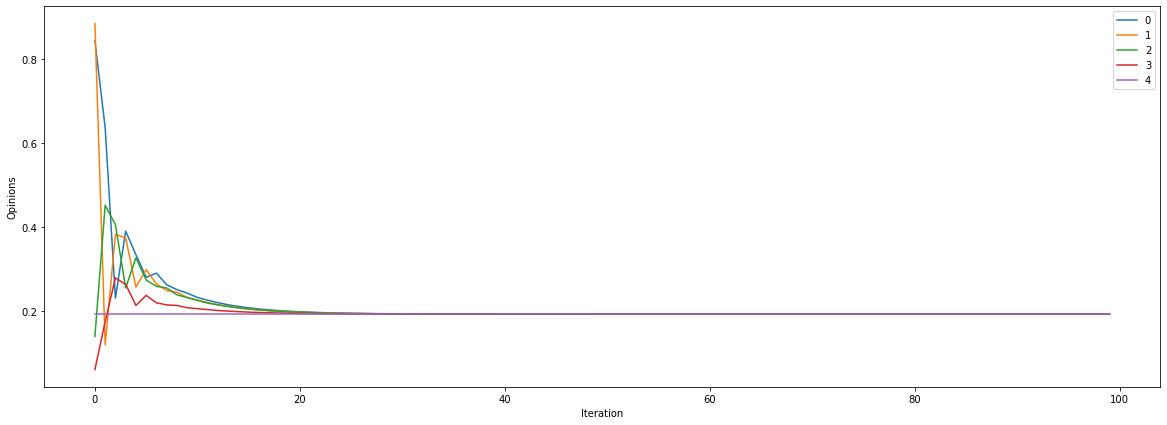

In [91]:
fig, ax = plt.subplots(figsize=(20,7)) 
for node in range(G.number_of_nodes()):
    plt.plot(np.array(values)[:,node], label=node)
ax.legend()
plt.xlabel('Iteration')
plt.ylabel('Opinions')
plt.legend()
plt.savefig("plot_con_g.eps",format='eps')

In [42]:
w,v = np.linalg.eig(P1.T)
mu = 0
sigma2 = 16
sigma = np.sqrt(sigma2)
consensus = []
num_sims = 2000
# selects the eigenvalue 1 and print the eigenvector
for counter in range(num_sims):
    init_vec = np.random.normal(loc=mu, scale=sigma, size=G.number_of_nodes())
    for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
        pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
        pi = pi/np.sum(pi)
    consensus.append(np.sum(pi*init_vec))
    
print('Sigma^2:', sigma2)
print('Variance in consensus values from simulation:', np.var(consensus,ddof=True))
theo_var = sigma2*np.sum(pi**2)
print("Theretical var:", theo_var)

Sigma^2: 16
Variance in consensus values from simulation: 15.123593626623974
Theretical var: 16.0


# H 
Consider the graph (V, E, Λ), and remove the edges (c, b) and (d, a). Analyse the French-
DeGroot dynamics on the new graph. In particular, describe and motivate the asymptotic
behaviour of the dynamics in terms of the initial condition x(0).

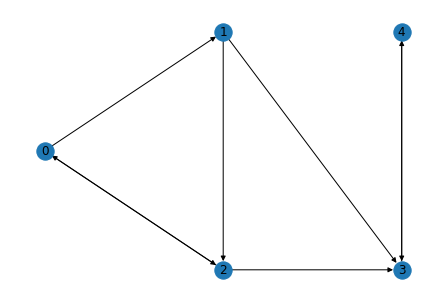

In [57]:
G2 = G.copy()
G2.remove_edges_from([(3,2), (4,1)])
nx.draw(G2, pos=positions, with_labels = True)
# plt.savefig("graph1_h.eps",format='eps')

In [52]:
Lambda2 = Lambda.copy()
Lambda2[3,2] = 0
Lambda2[4,1] = 0
omega2 = np.sum(Lambda2, axis=1)
D2 = np.diag(omega2)
P2 = np.linalg.inv(D2) @ Lambda2
omega_star2 = np.max(omega2)
Q2 = Lambda2/omega_star2 
# add the diagonal part
Q2 = Q2 + np.diag(np.ones(len(omega2))-np.sum(Q2,axis=1))
Q2_cum = np.cumsum(Q2, axis=1)
P2_cum = np.cumsum(P2, axis=1)

In [94]:
w,v = np.linalg.eig(P2.T)
np.random.seed(2045)
init_vec = np.random.rand(G2.number_of_nodes())
values = []
values.append(init_vec)
print('Initial values:',init_vec)
# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(len(G2)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)


np.random.seed(2045)
x = np.random.rand(G2.number_of_nodes())
for n in range(100):
    x = P2 @ x
    values.append(x)
    
print("x(100):", x, "\n")

## Consensus is not achieved because there are more than one sink. Rest of the nodes try to reach a value somewhere between those two

Initial values: [0.84417125 0.88556227 0.13949022 0.06054265 0.19244713]
x(100): [0.12142164 0.11634839 0.16200764 0.06054265 0.19244713] 



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


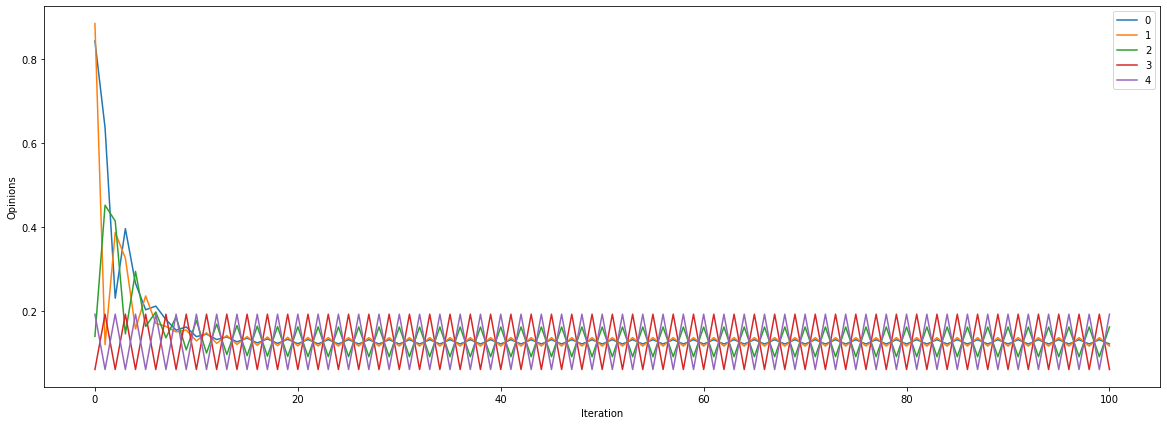

In [95]:
fig, ax = plt.subplots(figsize=(20,7)) 
for node in range(G.number_of_nodes()):
    plt.plot(np.array(values)[:,node], label=node)
ax.legend()
plt.xlabel('Iteration')
plt.ylabel('Opinions')
plt.legend()
plt.savefig("plot_con_h.eps",format='eps')